In [1]:
import json
import importlib
import matplotlib.pyplot as plt
import os
import sys
from multiplex import drawable

jsontweets = json.load(open('Data/MeanSentiment.json'))
tweets = {jsontweets[id]['id']: jsontweets[id]['text'] for id in jsontweets}
LanguageP = tweets

In [2]:
_date_range = os.listdir('Data/FilteredTwitterIDs/')
dates = {'Dec':[], 'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[]}
for date in _date_range:
    if '0' in date:
        new_date = '01/'
    if '1' in date:
        new_date = '07/'
    if '2' in date:
        new_date = '14/'
    if '3' in date:
        new_date = '21/'
    if '4' in date:
        if 'May' in date:
             new_date = '26/'
        else:
             new_date = '28/'

    if 'December' in date:
        new_date += '12'
        dates['Dec'].append(new_date)
    if 'January' in date:
        new_date += '01'
        dates['Jan'].append(new_date)
    if 'February' in date:
        new_date += '02'
        dates['Feb'].append(new_date)
    if 'March' in date:
        new_date += '03'
        dates['Mar'].append(new_date)
    if 'April' in date:
        new_date += '04'
        dates['Apr'].append(new_date)
    if 'May' in date:
        new_date += '05'
        dates['May'].append(new_date)

date_range = []

for month in dates:
    for date in dates[month]:
        date_range.append(date)

In [3]:
drawable = importlib.reload(drawable)
# reload the style
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex-dark.style"))

# create a general style
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

# create a specific style for Vardy's time series
en_style = { 'color': '#F6B913', 'label': 'English' }
es_style = { 'color': '#8B6508', 'label': 'Spanish' }
fr_style = { 'color': '#6BAEDF', 'label': 'French' }
de_style = { 'color': '#00B2EE', 'label': 'German' }
nl_style = { 'color': '#00EE00', 'label': 'Dutch' }
it_style = { 'color': '#9D1309', 'label': 'Italian' }

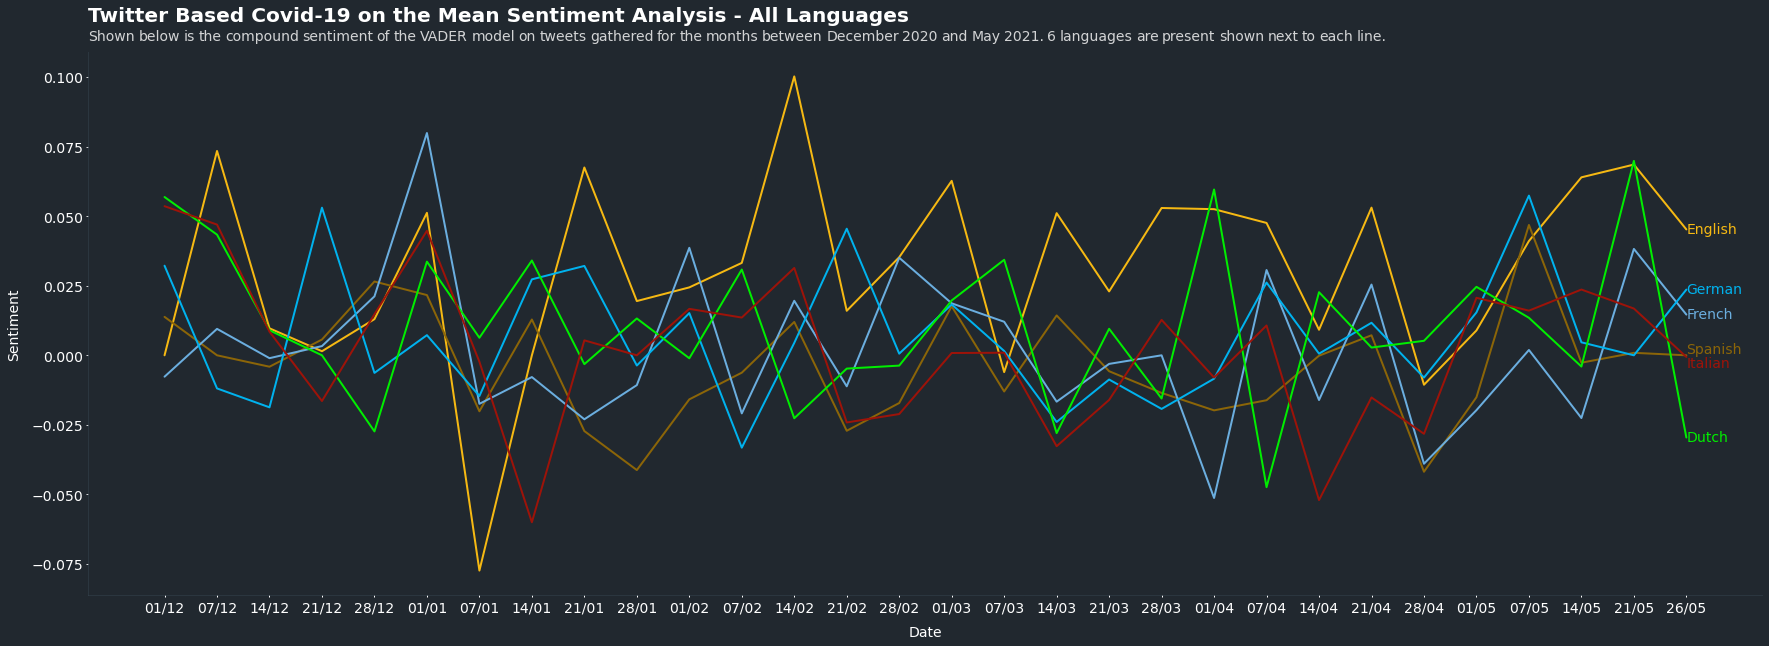

In [4]:
# draw the visualization
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[1], **style, **en_style)
viz.draw_time_series(range(0, 30), LanguageP[2], **style, **es_style)
viz.draw_time_series(range(0, 30), LanguageP[3], **style, **fr_style)
viz.draw_time_series(range(0, 30), LanguageP[4], **style, **de_style)
viz.draw_time_series(range(0, 30), LanguageP[5], **style, **nl_style)
viz.draw_time_series(range(0, 30), LanguageP[6], **style, **it_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - All Languages', loc='left')
viz.set_caption("""Shown below is the compound sentiment of the VADER model on tweets
                gathered for the months between December 2020 and May 2021.
                6 languages are present shown next to each line.
                """, align='justify')
viz.savefig(fname='All',dpi=300, bbox_inches='tight')
viz.show()

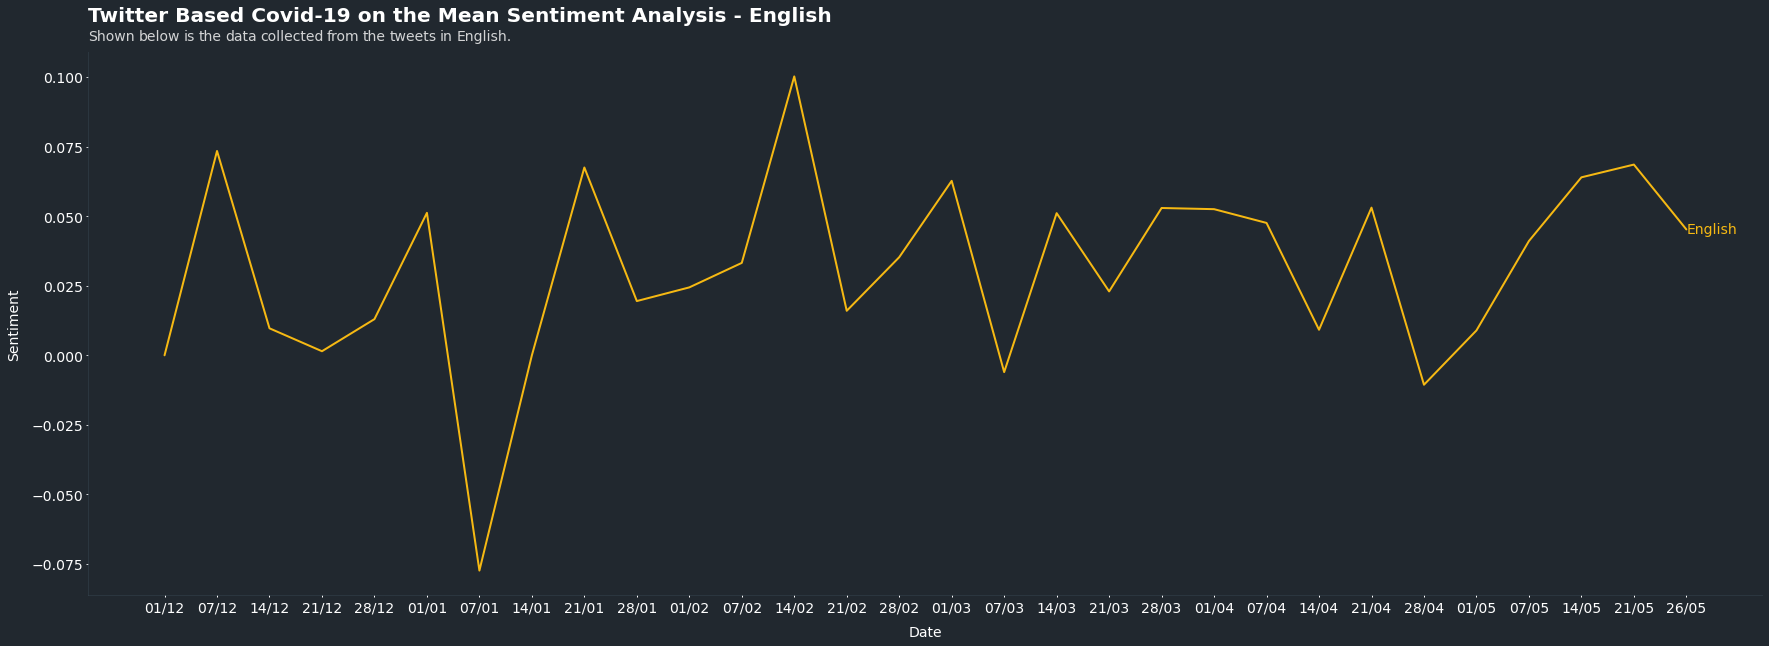

In [5]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[1], **style, **en_style)

plt.xticks(range(0, 30), date_range)
# viz.set_xticks(range(0, 30))#, date_range
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - English', loc='left')
viz.set_caption("""Shown below is the data collected from the tweets in English.""", align='justify')
viz.savefig(fname='English',dpi=300, bbox_inches='tight')

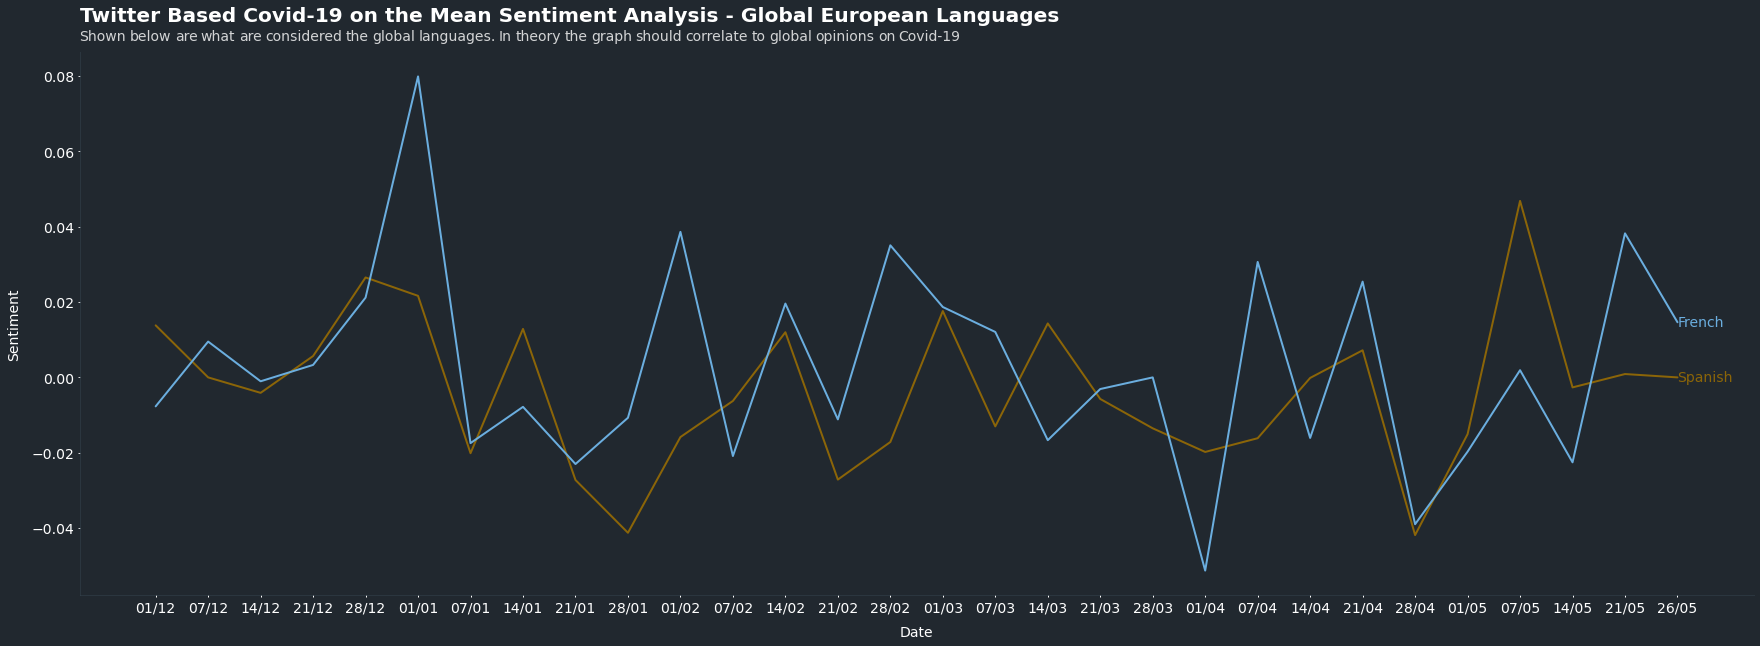

In [6]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[2], **style, **es_style)
viz.draw_time_series(range(0, 30), LanguageP[3], **style, **fr_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - Global European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the global languages.
                    In theory the graph should correlate to global opinions on Covid-19""", align='justify')
viz.savefig(fname='Global',dpi=300, bbox_inches='tight')
viz.show()

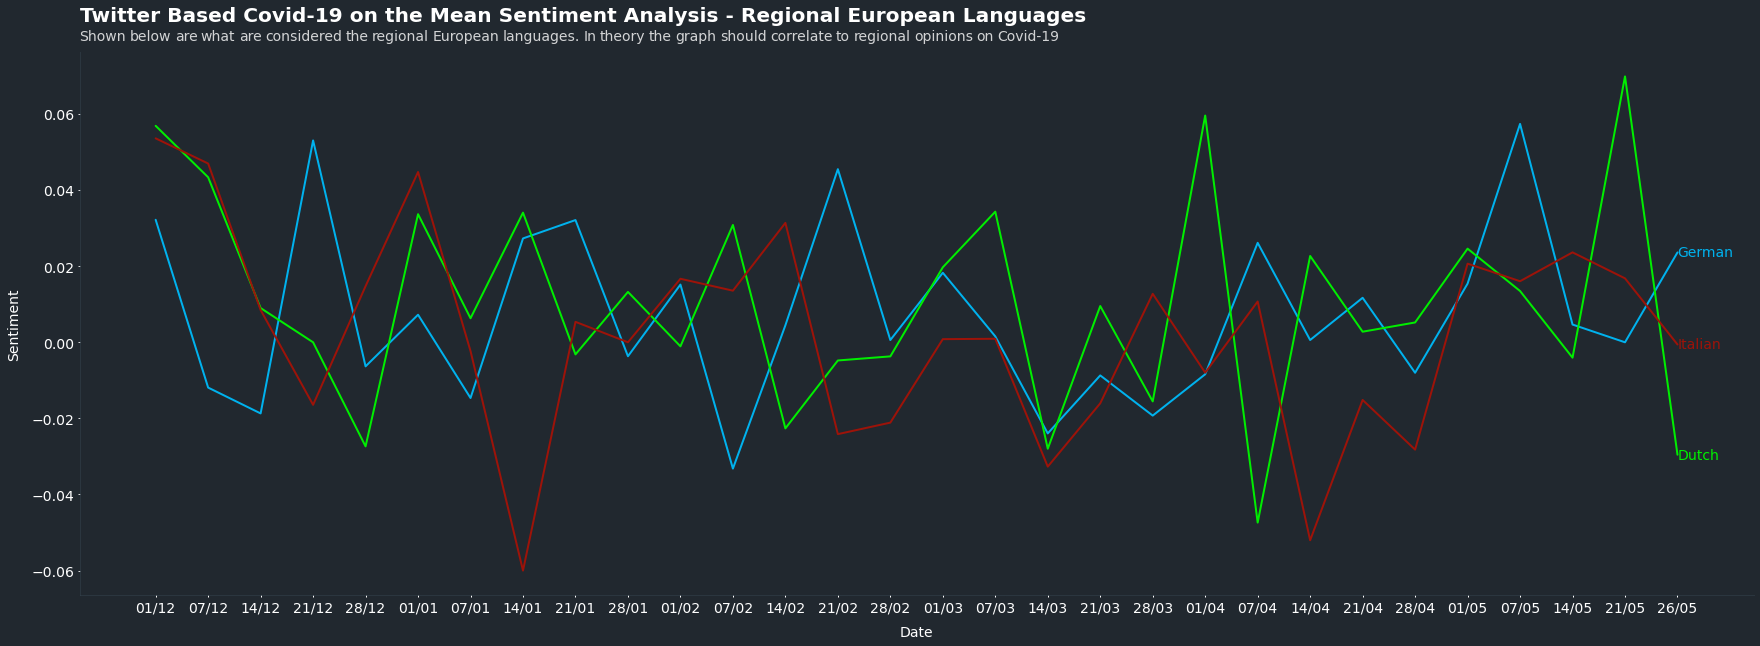

In [7]:
figure = plt.figure(figsize=(30, 10))
viz = drawable.Drawable(figure)
viz.draw_time_series(range(0, 30), LanguageP[4], **style, **de_style)
viz.draw_time_series(range(0, 30), LanguageP[5], **style, **nl_style)
viz.draw_time_series(range(0, 30), LanguageP[6], **style, **it_style)

plt.xticks(range(0, 30), date_range)
viz.set_xlabel('Date')
viz.set_ylabel('Sentiment')

viz.set_title('Twitter Based Covid-19 on the Mean Sentiment Analysis - Regional European Languages', loc='left')
viz.set_caption("""Shown below are what are considered the regional European languages.
                    In theory the graph should correlate to regional opinions on Covid-19""", align='justify')
viz.savefig(fname='Europe',dpi=300, bbox_inches='tight')
viz.show()


